In [49]:
from pymatgen.ext.matproj import MPRester
from pymatgen.io.cif import CifWriter
from pymatgen.core.lattice import Lattice
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
from pymatgen.core.operations import SymmOp
import numpy as np

with MPRester("vKG3XPbn7JethOZI") as m:

    # Structure for material id
    structure_mol = m.get_structure_by_material_id("mp-9813")
    w = CifWriter(structure_mol)
    w.write_file('structure_mol.cif')
    #print(structure_mol, '\n')
    
    #Create SymOp regarding Jmol Crystal Symmetry Explorer
    #Mirror plan
    sym_c3_axis = SymmOp.from_xyz_string('-y,x-y,z')
    sym_mirror_plane = SymmOp.from_xyz_string('-y,-x,z')
    sym_gglide_plane = SymmOp.from_xyz_string('-x+y+1/3,y-1/3,z-1/3')
    
    #Points
    S_atom1 = np.array([1.0,0.0,0.41])
    S_atom2 = np.array([1.0,1.0,0.26])
    W_atom = np.array([0.33,0.67,0.67])
    
    #Apply operations
    result1 = sym_c3_axis.operate(S_atom1)
    result2 = sym_mirror_plane.operate(S_atom2)
    result3 = sym_gglide_plane.operate(W_atom)
    
    #SHOW resulting positions
    print('From this position :\n', S_atom1,'\na C3 axis symmetry operation\n', sym_c3_axis.rotation_matrix,'\nis applied, the resulting position is :\n', result1, '\n \n \n')
    print('From this position :\n', S_atom2,'\na mirror plane symmetry operation\n', sym_mirror_plane.rotation_matrix,'\nis applied, the resulting position is :\n', result2, '\n \n \n')
    print('From this position :\n', W_atom,'\na g-glide plane symmetry operation\n', sym_gglide_plane.rotation_matrix,'\nis applied, the resulting position is :\n', result3, '\n \n \n')
    print('The illustration of the symmetry operations are in the same order than their computations')
    

From this position :
 [1.   0.   0.41] 
a C3 axis symmetry operation
 [[ 0. -1.  0.]
 [ 1. -1.  0.]
 [ 0.  0.  1.]] 
is applied, the resulting position is :
 [0.   1.   0.41] 
 
 

From this position :
 [1.   1.   0.26] 
a mirror plane symmetry operation
 [[ 0. -1.  0.]
 [-1.  0.  0.]
 [ 0.  0.  1.]] 
is applied, the resulting position is :
 [-1.   -1.    0.26] 
 
 

From this position :
 [0.33 0.67 0.67] 
a g-glide plane symmetry operation
 [[-1.  1.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]] 
is applied, the resulting position is :
 [0.67333333 0.33666667 0.33666667] 
 
 



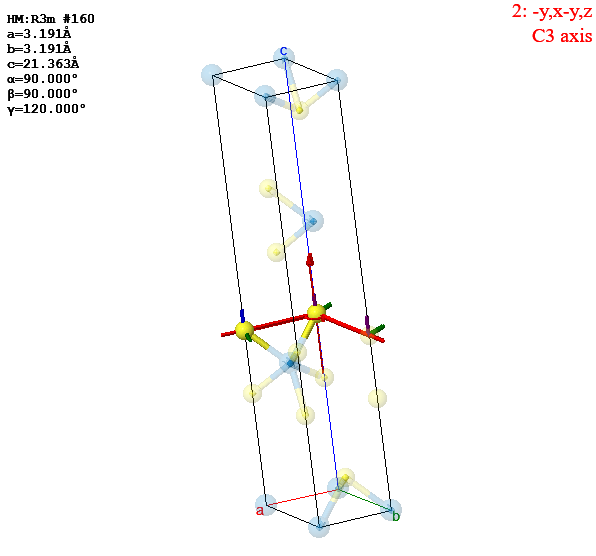

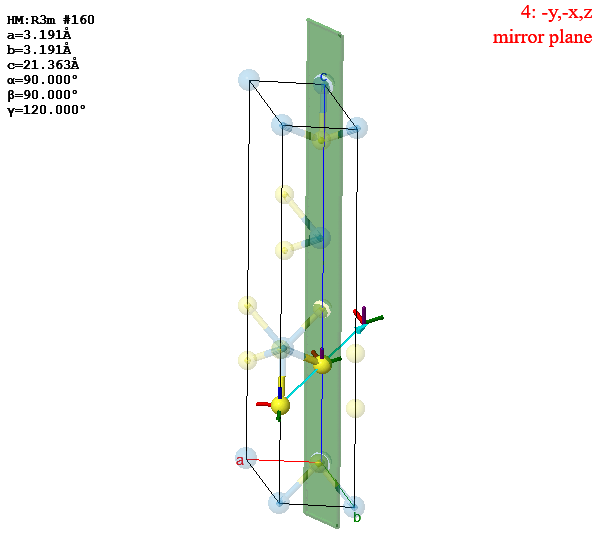
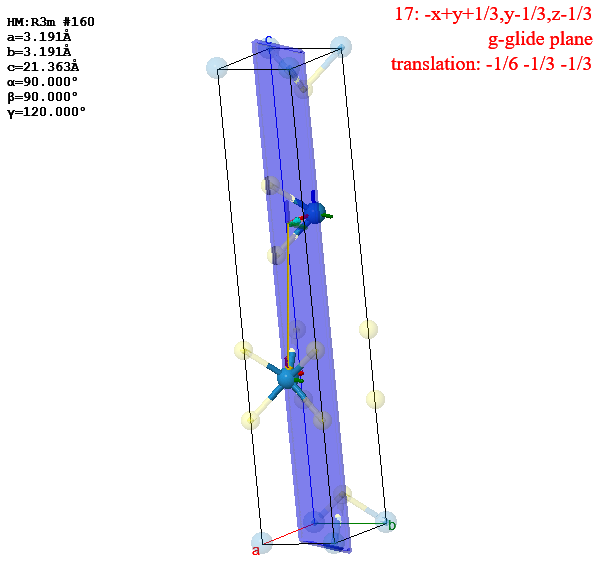